<a href="https://colab.research.google.com/github/SuperChicken566/ADL22/blob/main/Copy_of_chapter05_Dropout_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

A set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary. This enables us to focus on model building, training, and evaluation. 


In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
# only keep the top 10,000 most frequently occurring words in the training data. (out of ~90k)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print(len(train_data), len(test_data))

25000 25000


In [3]:
train_data[0][:11] #coded first 11 words of the Review #0

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458]

The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). 

train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data]) #top 10k words

9999

**Decoding reviews back to text**

Words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.

We can go back and forth between "3" and associated word or vice versa! 

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])


1654784/1641221 [==============================] - 0s 0us/step


In [7]:
#decode integers back to words
for i in train_data[0][:11]:
  print(i, reverse_word_index.get(i-3, "?"))

1 ?
14 this
22 film
16 was
43 just
530 brilliant
973 casting
1622 location
1385 scenery
65 story
458 direction


In [8]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
train_data[0][:11]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458]

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

Each review is different length. Format is no go as is.

**Multi-hot encode** your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model. 

Note that our train data size is now increased significantly!

In [10]:
#Note that length of reviews vary 
print("train_data[0]:", len(train_data[0]))
print("train_data[33]:", len(train_data[33]))
print("train_data[333]:", len(train_data[333]))

train_data[0]: 218
train_data[33]: 162
train_data[333]: 114


In [11]:
# Multi-hot encode your lists to turn them into vectors of 0s and 1s
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
print("train_data:", train_data.shape, "\nx_train:", x_train.shape)

train_data: (25000,) 
x_train: (25000, 10000)


In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

What type of problem are we solving? 

(Binary) classification.

Desnse layers with ReLu activation is a good start.


In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid") #WHY 1 NEURON???
    #A new output activation! What did we use last time? Why are we using a sigmoid?
])

**Compiling the model**

Dealing with a binary classification problem and the output of your model is a probability (you end your model with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss. 

In [16]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

create a validation set by setting apart 10,000 samples from the original training data.

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6504 - accuracy: 0.6122 - val_loss: 0.5742 - val_accuracy: 0.8359
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5511 - accuracy: 0.7475 - val_loss: 0.4749 - val_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4687 - accuracy: 0.8210 - val_loss: 0.3991 - val_accuracy: 0.8801
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4071 - accuracy: 0.8593 - val_loss: 0.3433 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3583 - accuracy: 0.8854 - val_loss: 0.3212 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3183 - accuracy: 0.9008 - val_loss: 0.3075 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2827 - accuracy: 0.9162 - val_loss: 0.2963 - val_accuracy: 0.8912
Epoch 8/20
30

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


**Plotting the training and validation loss**

Importance of validating your model! 

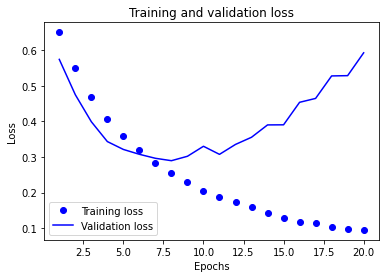

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

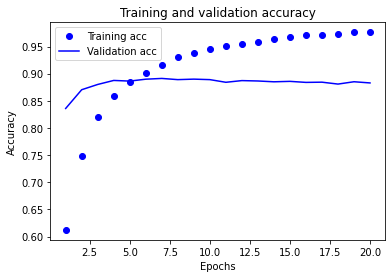

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient-descent optimization—the quantity you’re trying to minimize should be less with every iteration. 

But that isn’t the case for the validation loss and accuracy: they seem to peak at the ?dort? epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. 

In precise terms, what you’re seeing is **overfitting**: after the ??? epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

**Retraining a model from scratch**

In [23]:
e = 20 #number of epochs to avoid overtraining
# update!!

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_nod = model.fit(x_train, y_train, epochs=e, batch_size=512,                     validation_data=(x_val, y_val))

Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4475 - accuracy: 0.8295 - val_loss: 0.2864 - val_accuracy: 0.9111
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2606 - accuracy: 0.9098 - val_loss: 0.1992 - val_accuracy: 0.9373
Epoch 3/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2041 - accuracy: 0.9270 - val_loss: 0.1597 - val_accuracy: 0.9492
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1699 - accuracy: 0.9396 - val_loss: 0.1338 - val_accuracy: 0.9587
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1461 - accuracy: 0.9481 - val_loss: 0.1144 - val_accuracy: 0.9665
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1280 - accuracy: 0.9557 - val_loss: 0.1040 - val_accuracy: 0.9679
Epoch 7/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1152 - accuracy: 0.9606 - val_loss: 0.0919 - val_accuracy: 0.9738
Epoch 8/20
49

In [24]:
# history_nod
history_dict = history.history
h2 = history_nod.history

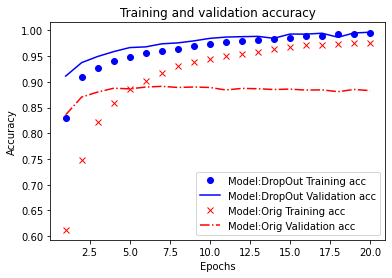

In [25]:
plt.clf()
acc2 = h2["accuracy"]
val_acc2 = h2["val_accuracy"]
plt.plot(epochs, acc2, "bo", label="Model:DropOut Training acc")
plt.plot(epochs, val_acc2, "b", label="Model:DropOut Validation acc")
plt.plot(epochs, acc, "rx", label="Model:Orig Training acc")
plt.plot(epochs, val_acc, "r-.", label="Model:Orig Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

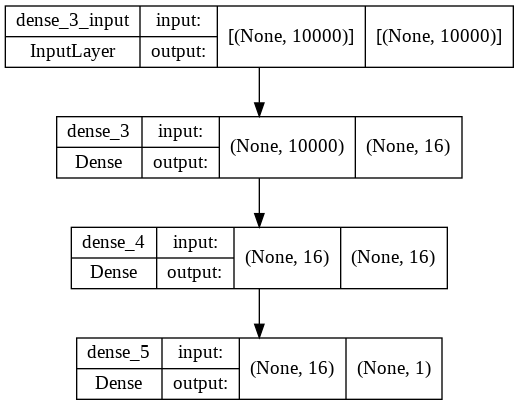

In [26]:
keras.utils.plot_model(model, "classifier_with_shape_info.png", show_shapes=True)

### Further experiments

*   Try setting dropout rate to values (0, 1)
*   You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy.
*   Try using callbacks

## Summary

- Text preprocessing
    - Encoding/Decoding data to work with a neural network

- Monitoring for overfitting
    - Number of epochs to train to avoid Validation testing performance loss
    - Early stopping and other callbacks
    
- Improve Model Generalization
    - Regularization via Dropout

## Future work

What else we can do?
- How to feature-ize text data / n-grams
- Sequence modeling with CNN vs RNN/LSTM, transformers